# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr
from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

import pandas_montecarlo

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")



Alpha Vantage Key type: <class 'str'>


In [3]:
name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info



What Country are you interested in traveling to?  Italy


Country name: italy 
Country Capital: Rome 
Country Border: ['AUT', 'FRA', 'SMR', 'SVN', 'CHE', 'VAT'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC+01:00'] 
Country Wiki: http://en.wikipedia.org/wiki/italy


In [4]:
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

In [5]:
# forex_pair = input("Enter the forex pair: ")
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
forex

,open,high,low,close,volume
2003-02-24,1.0731,1.0805,1.0705,1.0790,0
2003-02-25,1.0790,1.0821,1.0740,1.0765,0
2003-02-26,1.0764,1.0811,1.0726,1.0789,0
2003-02-27,1.0788,1.0837,1.0733,1.0767,0
2003-02-28,1.0765,1.0807,1.0729,1.0801,0
...,...,...,...,...,...
2022-04-18,1.0807,1.0822,1.0768,1.0778,0
2022-04-19,1.0776,1.0815,1.0760,1.0788,0
2022-04-20,1.0789,1.0867,1.0782,1.0851,0
2022-04-21,1.0850,1.0936,1.0822,1.0835,0


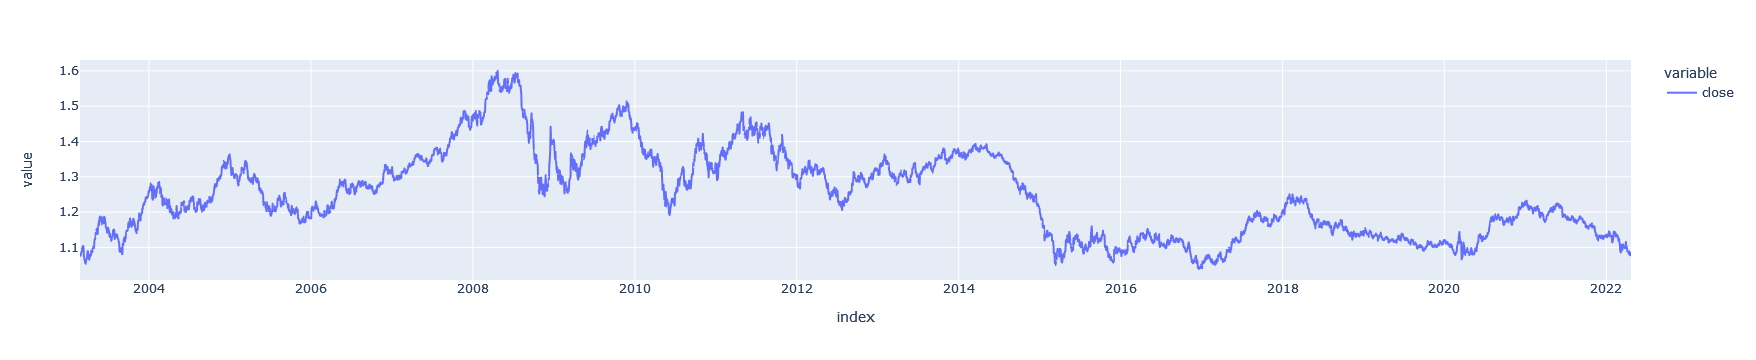

In [6]:
# plotting the opening and closing value 
forex[['close']].plot()



In [7]:
forex.describe()


,open,high,low,close,volume
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,1.249035,1.254410,1.243603,1.249023,0.0
std,0.120297,0.121109,0.119448,0.120293,0.0
min,1.039000,1.041800,1.033900,1.039000,0.0
25%,1.140075,1.144475,1.135500,1.139900,0.0
50%,1.233350,1.238800,1.227800,1.233250,0.0
75%,1.335725,1.340625,1.329000,1.335825,0.0
max,1.599600,1.603500,1.586600,1.599600,0.0


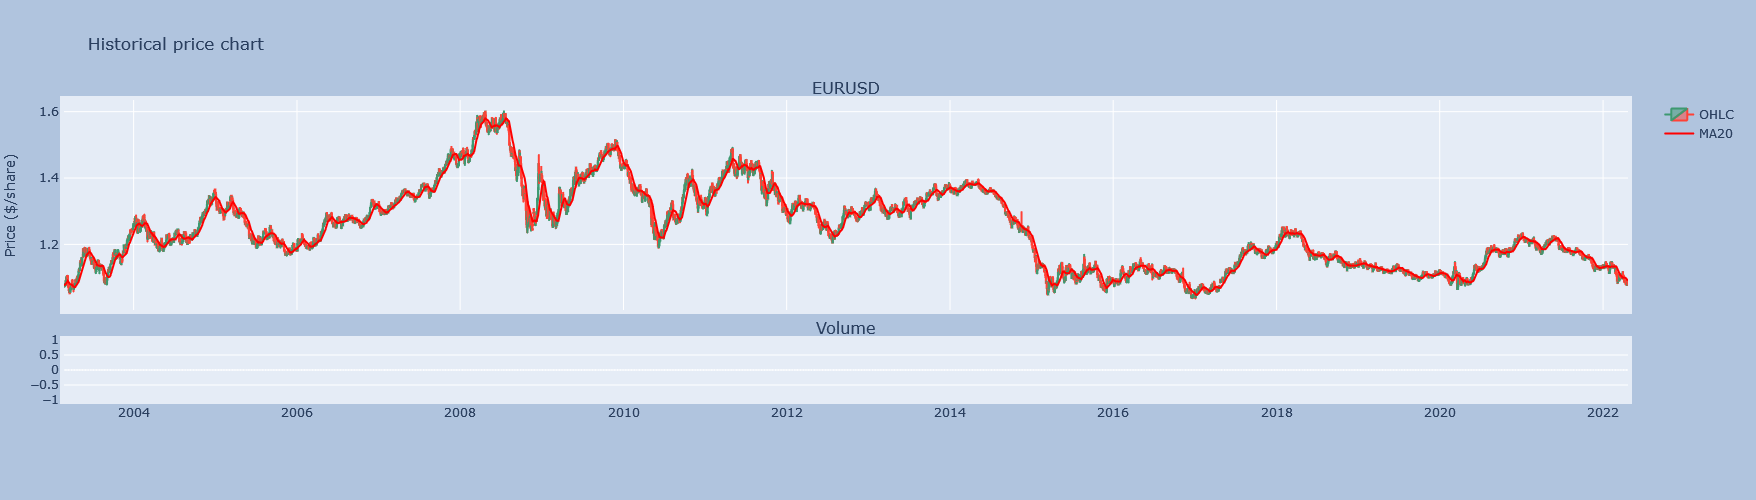

In [8]:
#20 period moving average
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
#eurusd['MA20'].head(30)

#Candlestick chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='red',name="MA20"), row=1, col=1)


fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

fig.update_layout(
    title= 'Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

# Foreign Exchange Currency Converter

In [ ]:
# Manually input currency

# currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
# from_currency, to_currency = input("From Currency: ").upper(), input("To Currency: ").upper()


# print(from_currency, "To", to_currency, amount)
# result =  currency.convert(from_currency, to_currency, amount)
# print("Conversion Amount: ", result)

In [9]:
# Only input the amount of currency to be converted. 


currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = pair.upper(), "USD"


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  100


EUR To USD 100
Conversion Amount:  108.17000000000002


# Monte Carlo Simulation on the returns of the inputed currency

### Import pandas_montecarlo and run monte carlo simulation with 10 simulations (for demo simplifications) and bust/max drawdown set to -10.0% and goal threshhold set to +100.0% (defaults is >=0%):

In [10]:
monte_carlo = forex['close'].montecarlo(sims=1000, bust =0.1, goal =1)

### Plot Simulations

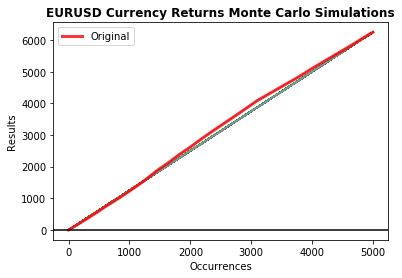

In [11]:
monte_carlo.plot(title=f"{forex_pair} Currency Returns Monte Carlo Simulations")

In [12]:
print(monte_carlo.stats)

{'min': 6245.116099999973, 'max': 6245.116100000036, 'mean': 6245.1161000001375, 'median': 6245.116100000006, 'std': 1.3257499724144802e-10, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [13]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [14]:
# Read in data
airports = pd.read_csv(
    Path("airports.csv")
).dropna()
airports

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
12664,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
12665,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports
12666,14110,Melitopol Air Base,Melitopol,Ukraine,\N,UKDM,46.880001,35.305000,0,\N,\N,\N,airport,OurAirports


In [15]:
airports.dtypes



Airport ID                 int64
Name                      object
 City                     object
 Country                  object
 IATA                     object
 ICAO                     object
 Latitude                float64
 Longitude               float64
 Altitude                  int64
 Timezone                 object
 DST                      object
 Tz database timezone     object
 Type                     object
 Source                   object
dtype: object

In [ ]:
name = airports['Name'].astype('string')
city = airports[' City'].astype('string')
country = airports[' Country'].astype('string')
latitude = airports[' Latitude'].astype('float')
longitude = airports[' Longitude'].astype('float')

#airports_df = pd.DataFrame(columns=['Name', 'City', 'Country', 'Latitude', 'Longitude'])
#airports_df

airports_df = pd.DataFrame(columns=airports[' City'].unique().astype('str')).transpose()
#airports_df = pd.DataFrame(columns=['City'])
airports_df

# airports_df = pd.DataFrame(columns=[airports['Name'].astype('string'), airports[' City'].astype('string'), airports[' Country'].astype('string'), airports[' Latitude'].astype('float'), airports[' Longitude'].astype('float')])
# airports_df = airports_df.transpose()
# airports_df

In [ ]:
# cities = airports[' City'].unique()
# cities

#.drop(columns=[' IATA', ' ICAO', ' Altitude', ' Timezone', ' DST', ' Type', ' Source'], inplace=True) 

cities = airports.astype('string').reset_index().groupby(' Name', ' City', ' Country', ' Latitude', ' Longitude')
cities

In [ ]:
# # Slice and plot data by name
# map_1 = px.scatter_mapbox(
#     airports,
#     lat=' Latitude',
#     lon=' Longitude',
#     color="Name"
# )
# map_1.show()